In [1]:
import numpy as np
from bandits.bernoulli import BernoulliBandit
from environment.bernoulli import BernoulliAgent
from visualization.beta import InteractiveBetaCollector

In [2]:
N = 5
MAX_ITERS = 200
ps = np.random.uniform(size=N)
agent = BernoulliAgent(ps)
bandit = BernoulliBandit(N)
collector = InteractiveBetaCollector(*bandit.get_beta_params(), ps)

for _ in range(MAX_ITERS):
    i = bandit.sample()
    reaction = agent.react(i)
    bandit.update(i, reaction)
    collector.update(*bandit.get_beta_params())

interactive(children=(IntSlider(value=0, description='index', layout=Layout(width='500px'), max=200), Output()…

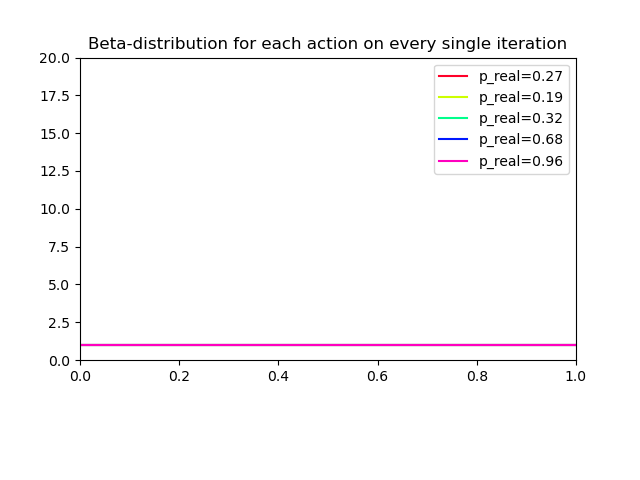

In [4]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import Layout, IntSlider
import matplotlib.pyplot as plt
from scipy.stats import beta

alphas, betas, probabilities = collector.get()

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 20.0])
xs = np.linspace(0.0, 1.0, 200)

@widgets.interact(index=IntSlider(0, 0, MAX_ITERS, 1, layout=Layout(width='500px')))
def update_plot(index):
    [line.remove() for line in ax.get_lines()]
    cm = plt.get_cmap('gist_rainbow')
    cm_range = np.linspace(0, 256, N)
    norm = plt.Normalize(0, 256)
    for a, b, p, cm_idx in zip(alphas[index], betas[index], probabilities, cm_range):
        ys = beta.pdf(xs, a, b)
        line, = ax.plot(xs,ys, label=f'p_real={round(p, 2)}')
        line.set_color(cm(norm(cm_idx)))
        ax.legend()
    plt.title("Beta-distribution for each action on every single iteration")